## Keras Basics

In [1]:
import tensorflow as tf
tf.__version__

'1.2.0'

In [4]:
import keras

In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


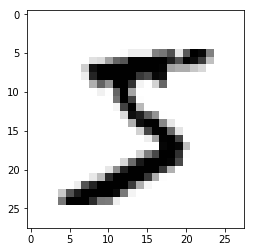

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [11]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [18]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 105us/step - loss: 0.2632 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 6s 93us/step - loss: 0.1053 - acc: 0.9679
Epoch 3/3
60000/60000 [==============================] - 6s 94us/step - loss: 0.0733 - acc: 0.9768


In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 36us/step
0.10295041873101145 0.9663


In [21]:
model.save('epic_num_reader.model')

In [22]:
new_model = keras.models.load_model('epic_num_reader.model')

In [24]:
predictions = new_model.predict([x_test]) #list alıyor 

In [25]:
import numpy as np
print(np.argmax(predictions[0]))

7


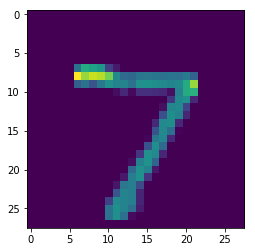

In [27]:
plt.imshow(x_test[0])
plt.show()

## Kaggle Cat/Dog 

In [29]:
import os
#import cv2

In [ ]:
DATA_DIR = "/home/ezgi/Desktop/SemesterProject_EPFL/Code"
CATEGORIES = ["Dog,Cat"]
training_data = []


for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), 
                               cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass
    

In [30]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))

In [32]:
import random
random.shuffle(training_data)

X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,1)
y=np.array(y)



In [34]:
import pickle

In [36]:
pickle_out = open("X.picle","wb")
pickle.dump(X,pickle_out)
pickle.close()

#do the same thing for y

In [ ]:
picle_in = open("X.picle","rb")
X= picle.load(picle_in)

## ConvNets

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [56]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit = (X,y, batch_size=32 , epochs=3, validation_split=0.1)